In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv",)
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print("Unique values in sex:",df['sex'].unique())
print("Number of categories in sex:", df['sex'].nunique())

Unique values in sex: ['female' 'male']
Number of categories in sex: 2


In [6]:
print("Unique values in smoker:",df['smoker'].unique())
print("Number of categories in smoker:", df['smoker'].nunique())

Unique values in smoker: ['yes' 'no']
Number of categories in smoker: 2


In [7]:
print("Unique values in region:",df['region'].unique())
print("Number of categories in region:", df['region'].nunique())

Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']
Number of categories in region: 4


In [8]:
print("Counts for 'sex':\n",df['sex'].value_counts())
print("Counts for 'smoker':\n",df['smoker'].value_counts())
print("Counts for 'region':\n",df['region'].value_counts())

Counts for 'sex':
 sex
male      676
female    662
Name: count, dtype: int64
Counts for 'smoker':
 smoker
no     1064
yes     274
Name: count, dtype: int64
Counts for 'region':
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [10]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
print(df.groupby("smoker").mean("charges"))

              age        bmi  children       charges
smoker                                              
no      39.385338  30.651795  1.090226   8434.268298
yes     38.514599  30.708449  1.113139  32050.231832


In [12]:
print(df.corr(numeric_only=True))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Distribution of charges')

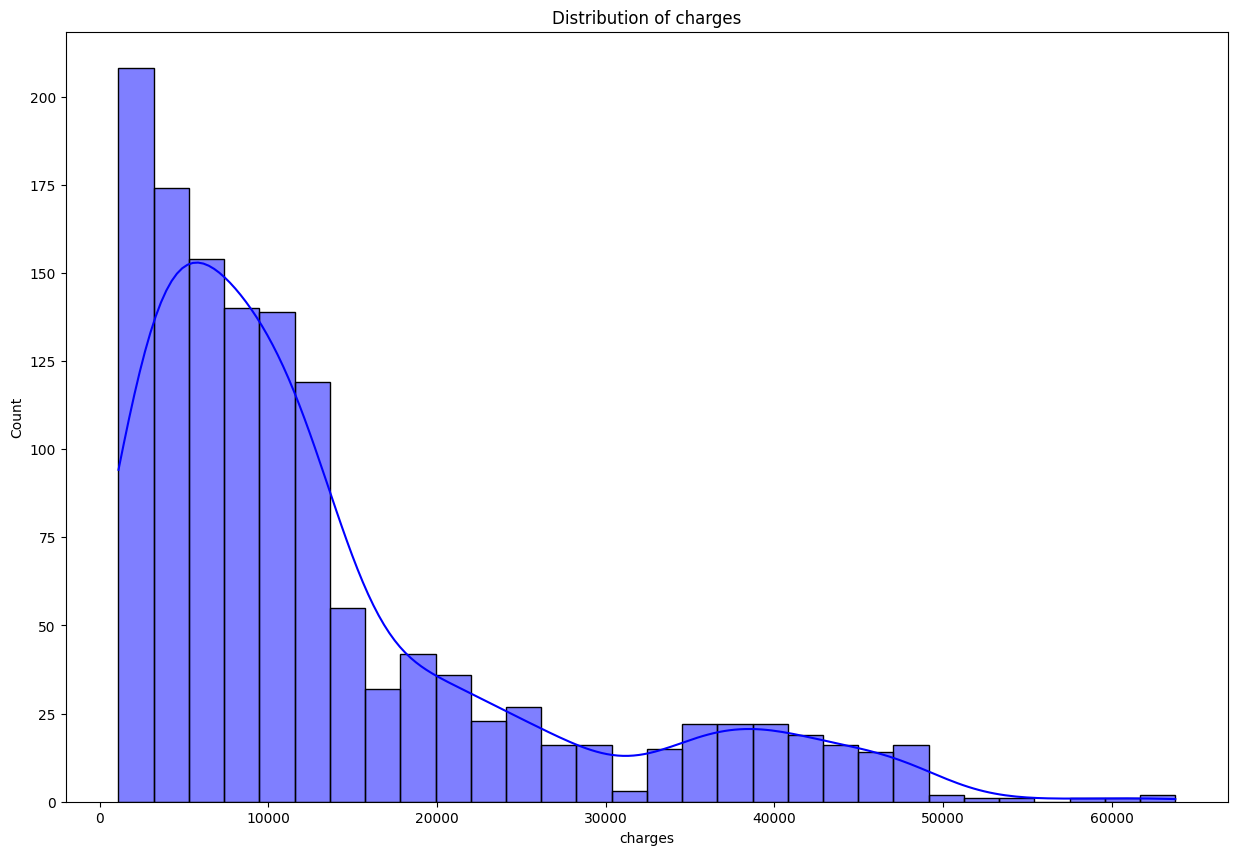

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(df["charges"],kde=True,color='blue')
plt.title("Distribution of charges")

Text(0.5, 1.0, 'Age vs Charges based on smoking habit')

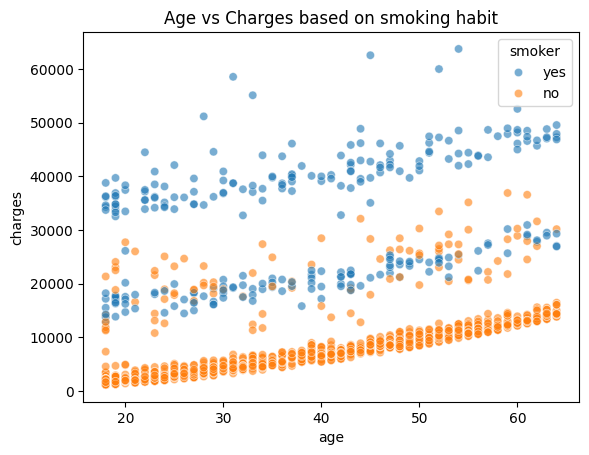

In [14]:
sns.scatterplot(x="age",y="charges",data=df,hue="smoker",alpha=0.6)
plt.title("Age vs Charges based on smoking habit")

Text(0.5, 1.0, 'bmi vs charges based on smoking habit')

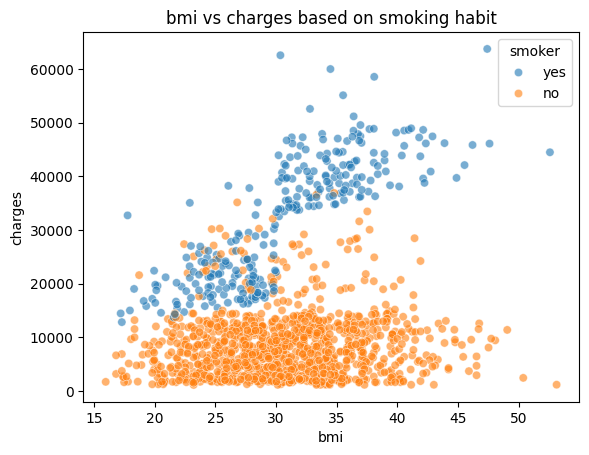

In [15]:
sns.scatterplot(data=df,x='bmi',y='charges',hue = 'smoker',alpha = 0.6)
plt.title("bmi vs charges based on smoking habit")

Text(0.5, 1.0, 'charges vs (smoker & non-smoker)')

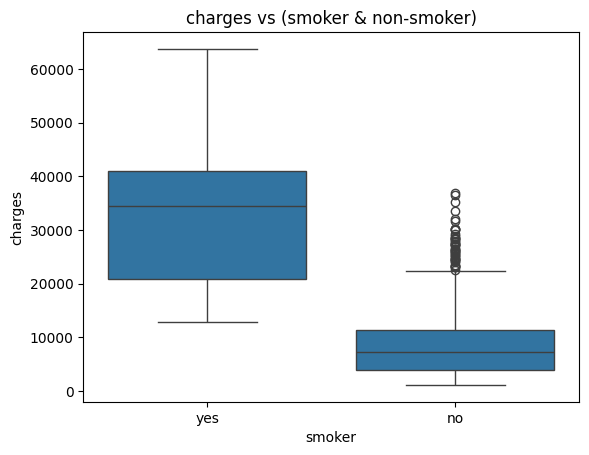

In [16]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.title("charges vs (smoker & non-smoker)")

Text(0.5, 1.0, 'distribution of bmi')

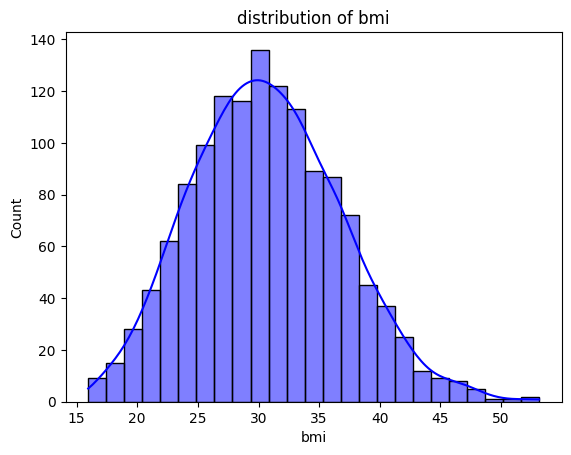

In [17]:
sns.histplot(df['bmi'],kde = True, color = 'blue')
plt.title("distribution of bmi")

Text(0.5, 1.0, 'log-charges histogram')

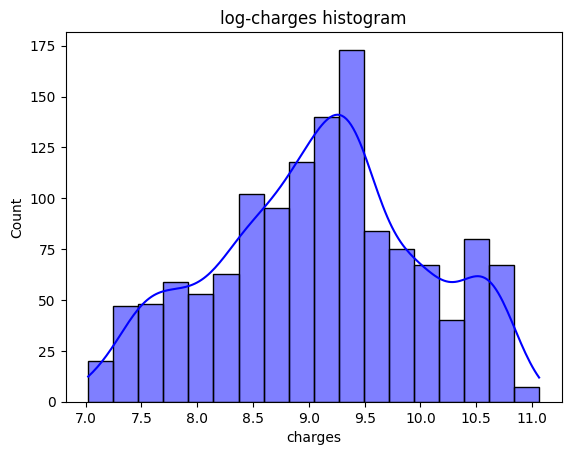

In [18]:
sns.histplot(np.log(df['charges']),kde = True, color = 'blue')
plt.title("log-charges histogram")

Text(0.5, 1.0, 'Distribution of Age')

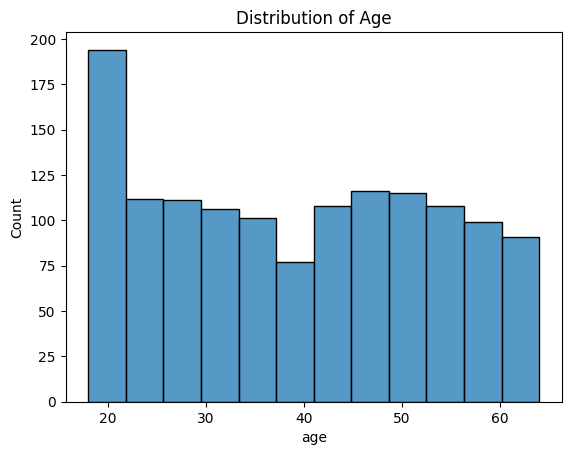

In [19]:
sns.histplot((df['age']))
plt.title("Distribution of Age")

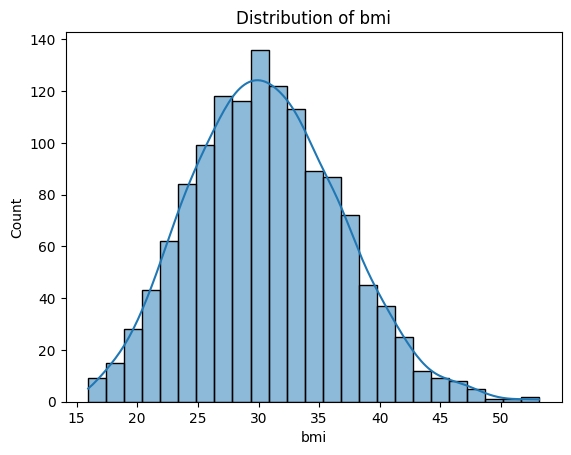

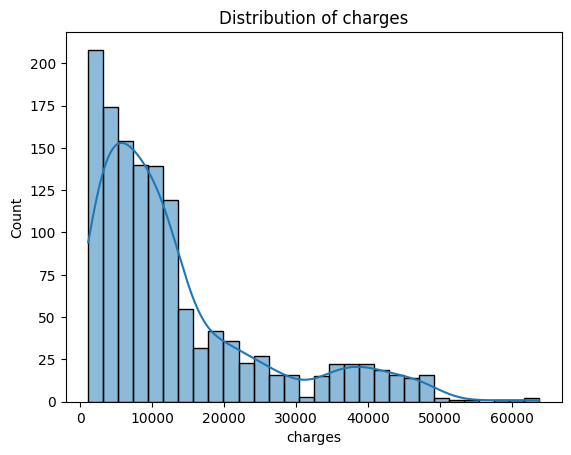

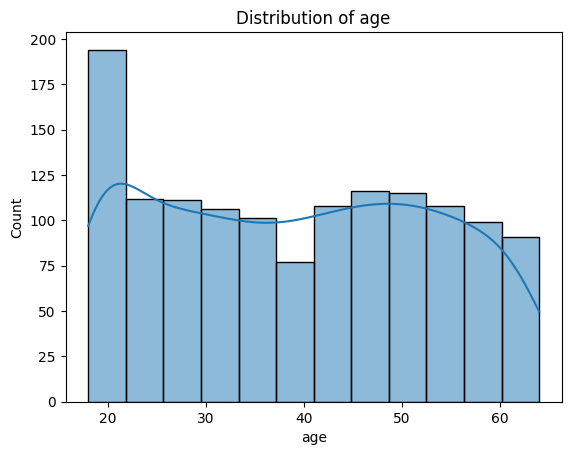

In [29]:
numeric = ["bmi", "charges", "age"]
for col in numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [34]:
from scipy import stats
stats.norm.fit(df['bmi'])

(np.float64(30.66339686098655), np.float64(6.0959076415894256))

In [3]:
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate example: 1000 policies, 'X' is a numeric feature (e.g., age)
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = np.random.gamma(shape=2, scale=3, size=1000)  # Positive, skewed "claim" values

# Fit gamma regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = GammaRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

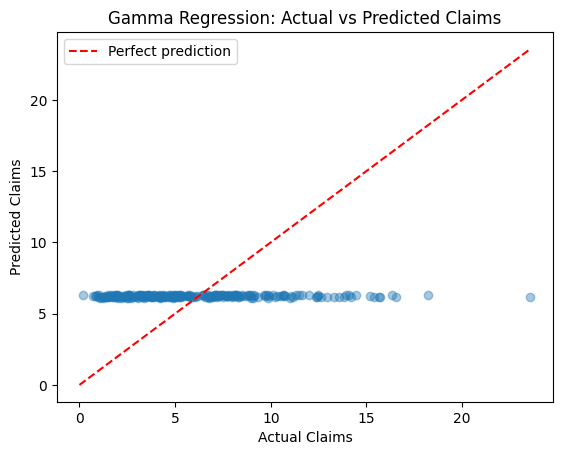

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='Perfect prediction')
plt.xlabel('Actual Claims')
plt.ylabel('Predicted Claims')
plt.title('Gamma Regression: Actual vs Predicted Claims')
plt.legend()
plt.show()

In [20]:
# df.dtypes
# df['smoker'] = df['smoker'].map({'no':0,'yes':1})

In [21]:
# df['sex'].unique()
# df['sex'] = df['sex'].map({'male':1,'female':0})

In [22]:
# df = pd.get_dummies(df,columns = ['region'],drop_first=True)
# print(df.head())

In [23]:
# df['log_charges'] = np.log(df['charges'])
# sns.histplot(np.log(df['charges']),kde=True,color='blue')

In [24]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df,test_size=0.3,random_state=42)
# print(train.head())
# print(test.head())
# print(train.shape)
# print(test.shape)

In [25]:
# print(df['smoker'].value_counts(normalize=True))

In [26]:
# print(train['smoker'].mean())
# print(test['smoker'].mean())